In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
%matplotlib inline

#importing libraries

In [2]:
#import pandas as pd

In [3]:
import warnings 
warnings.filterwarnings('ignore')

#to clear all warning from code 

In [4]:
from pandas_profiling import ProfileReport

In [5]:
df = pd.read_csv("diamonds.csv")
df.head()
#importing my insurance.csv file

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789


In [6]:
df.shape

(50000, 8)

In [7]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='cut', ylabel='Count'>

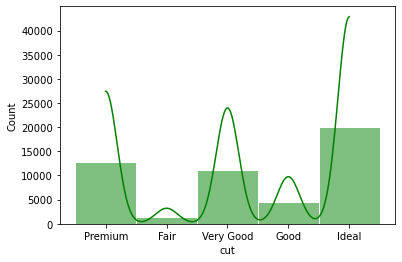

In [8]:
sns.histplot(df['cut'], color ='g', kde = True, bins = 10, edgecolor= 'white')

#using histplot to display data for cut quality

<AxesSubplot:xlabel='carat', ylabel='Count'>

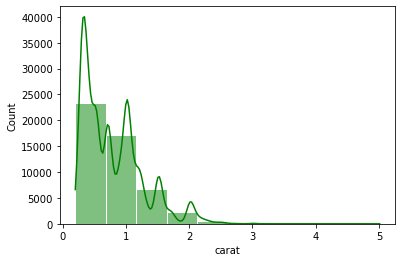

In [9]:
sns.histplot(df['carat'], color ='g', kde = True, bins = 10, edgecolor= 'white')

#using histplot to find out distribution diamonds by size in carats

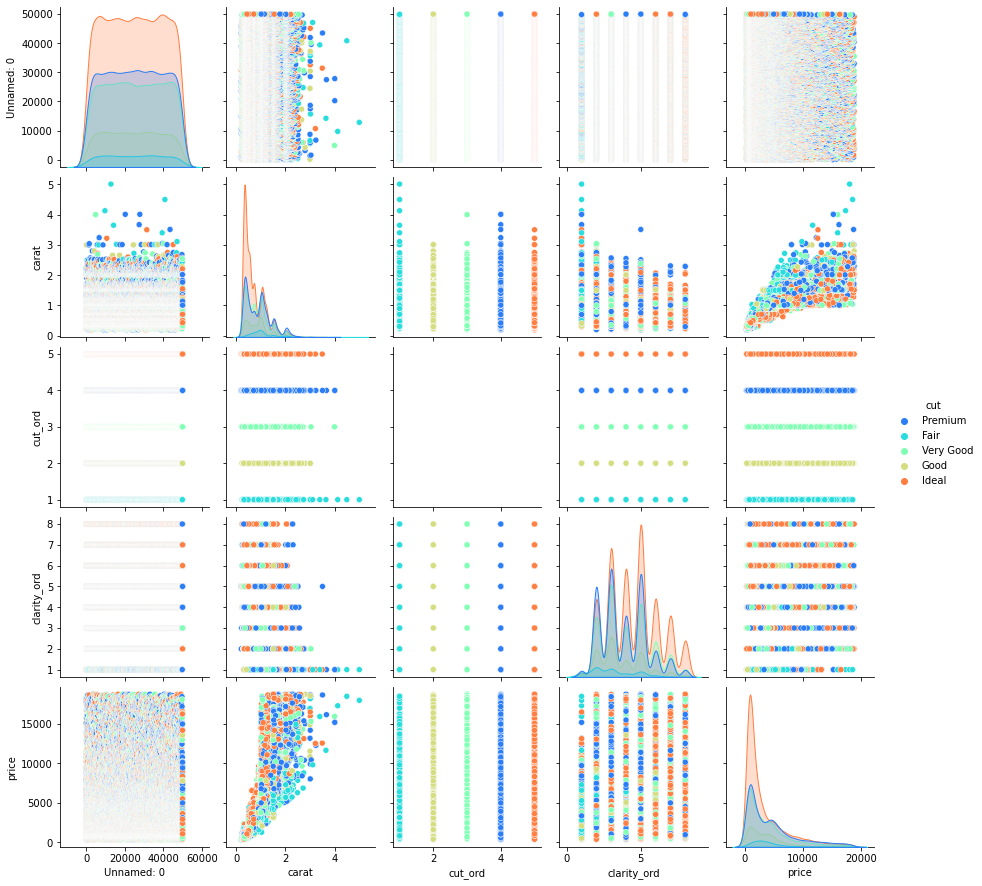

In [10]:
sns.pairplot(df, hue = 'cut',  palette = 'rainbow')

#using pair plots to show relationship and analyze the distribution of variables 

In [11]:
df.cov()

,Unnamed: 0,carat,cut_ord,clarity_ord,price
Unnamed: 0,2.083375e+08,-14.827299,21.439799,22.286216,-1.122679e+05
carat,-1.482730e+01,0.225294,-0.071938,-0.271736,1.748288e+03
cut_ord,2.143980e+01,-0.071938,1.247785,0.352493,-2.401571e+02
clarity_ord,2.228622e+01,-0.271736,0.352493,2.774103,-9.461207e+02
price,-1.122679e+05,1748.288324,-240.157085,-946.120736,1.596706e+07


In [12]:
df.corr()

,Unnamed: 0,carat,cut_ord,clarity_ord,price
Unnamed: 0,1.000000,-0.002164,0.001330,0.000927,-0.001947
carat,-0.002164,1.000000,-0.135679,-0.343725,0.921777
cut_ord,0.001330,-0.135679,1.000000,0.189461,-0.053804
clarity_ord,0.000927,-0.343725,0.189461,1.000000,-0.142159
price,-0.001947,0.921777,-0.053804,-0.142159,1.000000


<AxesSubplot:xlabel='carat', ylabel='price'>

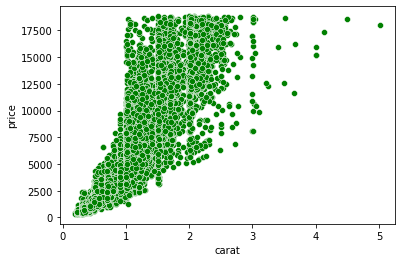

In [13]:
sns.scatterplot(x = "carat", y = "price", data = df, color ='g')

<AxesSubplot:xlabel='cut', ylabel='count'>

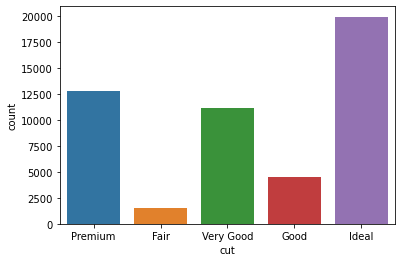

In [14]:
sns.countplot(x= "cut", data =df)

<AxesSubplot:xlabel='clarity', ylabel='count'>

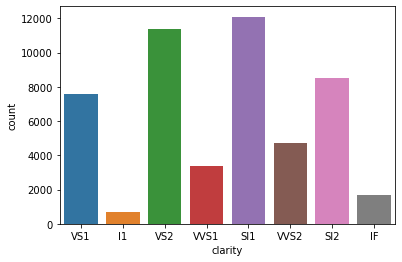

In [15]:
sns.countplot(x= "clarity", data =df)

<AxesSubplot:xlabel='cut', ylabel='price'>

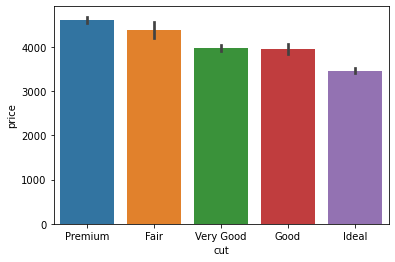

In [16]:
sns.barplot(x='cut',y='price', data = df)

<AxesSubplot:xlabel='cut', ylabel='price'>

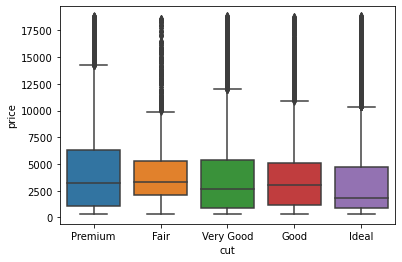

In [17]:
sns.boxplot(x='cut',y='price', data= df)

<AxesSubplot:xlabel='clarity', ylabel='price'>

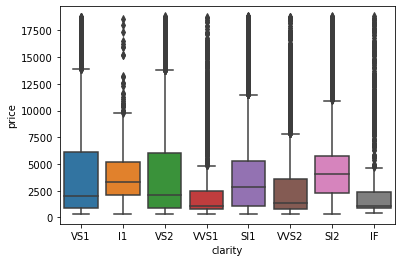

In [18]:
sns.boxplot(x='clarity',y='price', data= df)

# Machine Learning phase

In [19]:
target = df["price"]
x = df.drop(["price","cut_ord","clarity_ord","Unnamed: 0"],axis=1)
x.head()

,carat,cut,color,clarity
0,0.51,Premium,F,VS1
1,2.25,Fair,G,I1
2,0.70,Very Good,E,VS2
3,0.47,Good,F,VS1
4,0.30,Ideal,G,VVS1


In [20]:
x = pd.get_dummies(x)
x.head()

#label encoding method

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.51,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2.25,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0.70,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.47,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.30,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [21]:
#model.fit(x,target)

In [22]:
from sklearn.preprocessing import StandardScaler

#standard scaler makes your mean zero (0)
#makes your standard deviation one(1)
#it slim the data frame into a particular model

In [23]:
scaler = StandardScaler()
x =scaler.fit_transform(x)
x

array([[-0.6080254 , -0.17586311, -0.3162869 , ..., -0.54205944,
        -0.26921751, -0.32210675],
       [ 3.05785977,  5.6862407 , -0.3162869 , ..., -0.54205944,
        -0.26921751, -0.32210675],
       [-0.20772759, -0.17586311, -0.3162869 , ...,  1.84481613,
        -0.26921751, -0.32210675],
       ...,
       [ 0.71927785, -0.17586311, -0.3162869 , ...,  1.84481613,
        -0.26921751, -0.32210675],
       [ 0.44538988, -0.17586311, -0.3162869 , ...,  1.84481613,
        -0.26921751, -0.32210675],
       [ 2.0465811 , -0.17586311, -0.3162869 , ...,  1.84481613,
        -0.26921751, -0.32210675]])

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size =0.3, random_state = 40)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
model.fit(x_train,y_train)

LinearRegression()

In [29]:
print(model.intercept_)
print(model.coef_)

3936.3892926130025
[ 4.20604362e+03 -2.00156683e+13 -3.37362922e+13 -5.74706056e+13
 -5.11965840e+13 -4.88942248e+13 -5.77182723e+14 -6.71293590e+14
 -6.65075312e+14 -7.08679655e+14 -6.29298859e+14 -5.26440357e+14
 -3.87364026e+14 -1.52053173e+14 -2.34251274e+14 -5.59788467e+14
 -4.91527959e+14 -4.69261134e+14 -5.47631648e+14 -3.28120377e+14
 -3.81457663e+14]


In [30]:
print(model.coef_)

[ 4.20604362e+03 -2.00156683e+13 -3.37362922e+13 -5.74706056e+13
 -5.11965840e+13 -4.88942248e+13 -5.77182723e+14 -6.71293590e+14
 -6.65075312e+14 -7.08679655e+14 -6.29298859e+14 -5.26440357e+14
 -3.87364026e+14 -1.52053173e+14 -2.34251274e+14 -5.59788467e+14
 -4.91527959e+14 -4.69261134e+14 -5.47631648e+14 -3.28120377e+14
 -3.81457663e+14]


In [31]:
print(model.score(x_train,y_train))

0.9157363197575856


In [32]:
predictions = model.predict(x_test)

In [33]:
predictions

array([1623.38929261, 2425.49866761, 4801.13929261, ..., 6130.63929261,
       4684.01429261, 6695.23304261])

In [34]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
score = r2_score(predictions,y_test)
mae = mean_absolute_error(predictions,y_test)
mse = mean_squared_error(predictions,y_test)
rmse = np.sqrt(mse)

In [35]:
print(score)
print(mae)
print(mse)
print(rmse)

0.9084047873251492
798.7372591211125
1344927.0888076045
1159.7099158011906


# new diamonds model

In [36]:
df2 = pd.read_csv('new-diamonds.csv')
df2.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord
0,1,1.22,Premium,4,G,SI1,3
1,2,1.01,Good,2,G,VS2,5
2,3,0.71,Very Good,3,I,VS2,5
3,4,1.01,Ideal,5,D,SI2,2
4,5,0.27,Ideal,5,H,VVS2,6


In [37]:
k = df2.drop(["cut_ord","clarity_ord","Unnamed: 0"],axis=1)
k.head()

,carat,cut,color,clarity
0,1.22,Premium,G,SI1
1,1.01,Good,G,VS2
2,0.71,Very Good,I,VS2
3,1.01,Ideal,D,SI2
4,0.27,Ideal,H,VVS2


In [38]:
k = pd.get_dummies(k)
k.head()

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.22,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1.01,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.71,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1.01,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.27,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
scaler = StandardScaler()
k =scaler.fit_transform(k)
k

array([[ 0.89228516, -0.16868281, -0.31320382, ..., -0.54602137,
        -0.27153162, -0.32084447],
       [ 0.45093439, -0.16868281,  3.19280908, ...,  1.83143016,
        -0.27153162, -0.32084447],
       [-0.17956671, -0.16868281, -0.31320382, ...,  1.83143016,
        -0.27153162, -0.32084447],
       ...,
       [ 0.5350012 , -0.16868281, -0.31320382, ..., -0.54602137,
        -0.27153162, -0.32084447],
       [-0.20058342,  5.92828629, -0.31320382, ..., -0.54602137,
        -0.27153162, -0.32084447],
       [ 0.45093439, -0.16868281, -0.31320382, ..., -0.54602137,
        -0.27153162, -0.32084447]])

In [40]:
predictions = model.predict(k)
predictions

array([ 3.77840444e+13,  3.26734347e+13, -7.03203637e+13, ...,
        3.92552939e+13,  3.34640323e+13,  1.34529275e+12])

In [41]:
from xgboost import XGBRegressor
XGB =XGBRegressor()
XGB.fit(x,target)
predictions =XGB.predict(k)
predictions

array([6334.446 , 5779.263 , 2253.6804, ..., 4940.794 , 2025.3374,
       5065.0513], dtype=float32)

In [49]:
df2.assign(predicted_prices = predictions,)

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,predicted_prices
0,1,1.22,Premium,4,G,SI1,3,6334.445801
1,2,1.01,Good,2,G,VS2,5,5779.263184
2,3,0.71,Very Good,3,I,VS2,5,2253.680420
3,4,1.01,Ideal,5,D,SI2,2,4860.318359
4,5,0.27,Ideal,5,H,VVS2,6,530.726868
...,...,...,...,...,...,...,...,...
2995,2996,0.72,Ideal,5,F,SI2,2,2327.004639
2996,2997,1.09,Premium,4,I,VS2,5,4864.736816
2997,2998,1.05,Very Good,3,G,SI1,3,4940.793945
2998,2999,0.70,Fair,1,G,SI1,3,2025.337402


In [1]:
sns.barplot( x = 'clarity', y = 'predicted_prices',data =df2,)

NameError: name 'sns' is not defined